# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import clear_output

# Single-Particle Motions

## Uniform E and B Fields

### E=0

The particle will follow the trajectory:
$$
x-x_0 = r_L\sin{w_ct}\\
y-y_0 = r_L\cos{w_ct}
$$
Where:
$$
r_L = \frac{mv}{qB}\\
w_c = \frac{qB}{m}\\
$$

In [2]:
plt.rcdefaults()

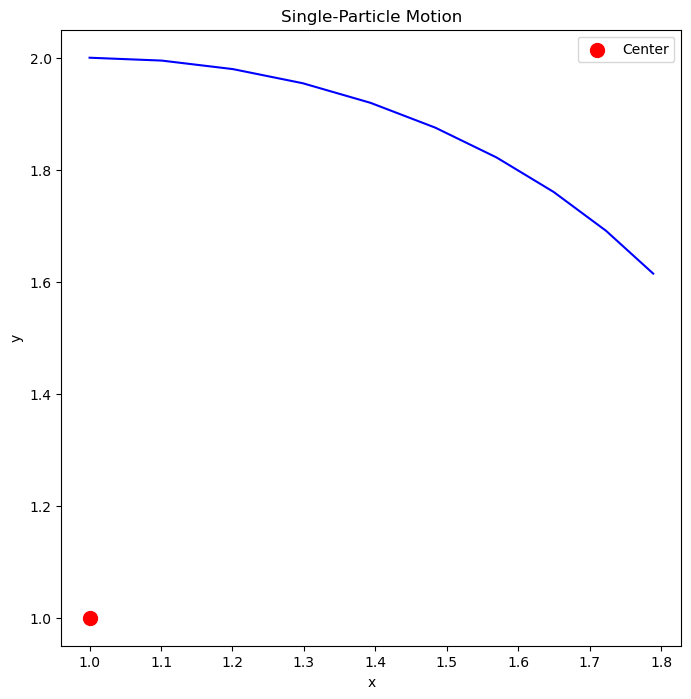

In [3]:
x0 = 1
y0 = 1
ts = np.linspace(0, 10, 100)
m = 1
v=1
q=1
B=1
rl = (m*v)/(q*B)
omega = (q*B/m)

xs = x0 + rl*np.sin(omega*ts)
ys = y0 + rl*np.cos(omega*ts)

plt.figure(figsize=(8, 8))
plt.plot(xs[:10], ys[:10], 'b-')
plt.scatter(x0, y0, c='r', s=100, label="Center")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single-Particle Motion')
plt.legend()
plt.show()

1000


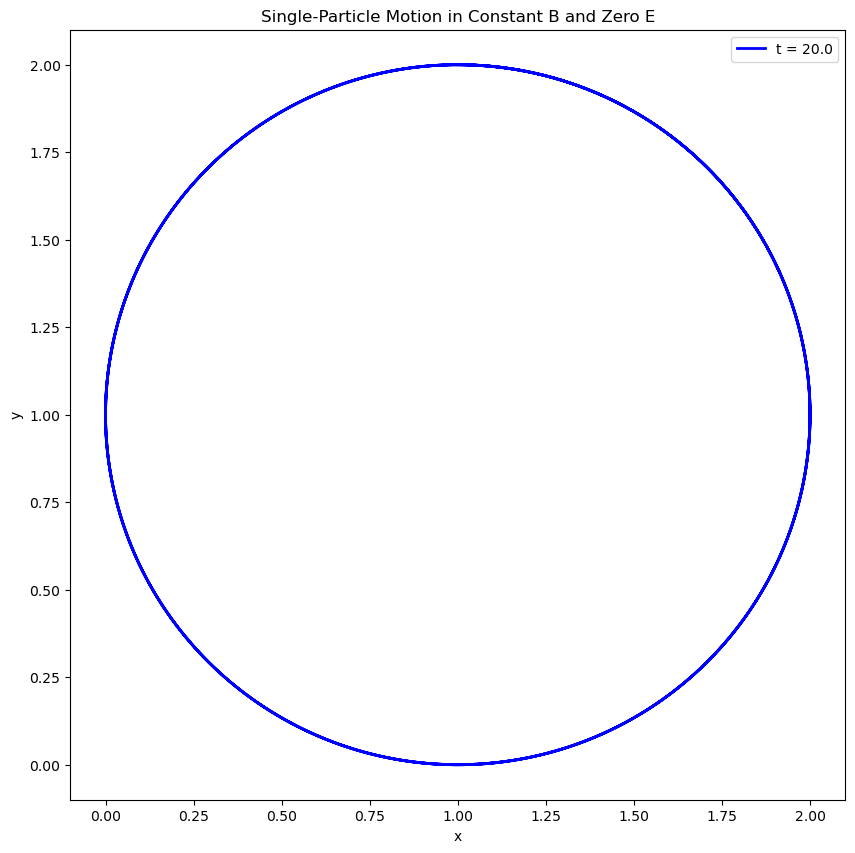

In [19]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np


# creating a blank window
# for the animation
fig = plt.figure(figsize=(10,10))
ts = np.linspace(0, 20, 1000)
axis = plt.axes(xlim =(-0.1, 2.1),
				ylim =(-0.1, 2.1))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single-Particle Motion in Constant B and Zero E')

line, = axis.plot([], [], lw = 2, c = 'b')

def get_position(i):
    x = x0 + rl*np.sin(omega*ts[i])
    y = y0 + rl*np.cos(omega*ts[i])
    return x, y
# what will our line dataset
# contain?
def init():
	line.set_data([], [])
	return line,

# initializing empty values
# for x and y co-ordinates
xdata, ydata = [], []
legend = plt.legend()
# animation function
def animate(i):
    if (i+1)%50==0:
        clear_output(wait=True)
        print(i+1)
    x, y = get_position(i)
	# appending values to the previously
	# empty x and y data holders
    xdata.append(x)
    ydata.append(y)
    line.set_label('t = '+str(round(ts[i],2)))
    legend = plt.legend(loc='upper right')
    line.set_data(xdata, ydata)
	
    return line ,legend

# calling the animation function	
anim = animation.FuncAnimation(fig, animate,
							init_func = init,
							frames = len(ts),
							interval = 20,
							blit = True)

# saves the animation in our desktop
anim.save('particle_in_zero_E.mp4', writer = 'ffmpeg', fps = 30)


### Finite E